In [5]:
# From the previous lesson:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
iris=pd.read_csv('.\datasets\iris.csv')
sepal_length=iris['sepal_length']

# List the species types, save them to variable 'species'
species=[]
for s in iris['species']:
    if s not in species:
        species.append(s)
        
# Collect the following data:
# setosa_petal_length
# versicolor_petal_length
# virginica_petal_length
setosa_petal_length=[]
versicolor_petal_length=[]
virginica_petal_length=[]
for s,p in zip(iris['species'],iris['petal_length']):
    if s == 'Iris-setosa':
        setosa_petal_length.append(p)
    if s =='Iris-versicolor':
        versicolor_petal_length.append(p)
    if s =='Iris-virginica':
        virginica_petal_length.append(p) 

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y
        
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Summary statistics

### mean
Compute the mean petal length of Iris versicolor. Remember, you have already computed versicolor_petal_length. <br>
Assign the mean to mean_length_vers.

In [7]:
# Compute the mean: mean_length_vers
mean_length_vers=np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('Mean petal length of Iris-versicolor:', mean_length_vers, 'cm')

Mean petal length of Iris-versicolor: 4.26 cm


### percentiles

Compute the percentiles of petal length of Iris versicolor. Remember, you have already computed versicolor_petal_length.

Assign the mean to ptiles_vers.

In [14]:
# Create a NumPy array of the 2.5th, 25th, 50th, 75th, and 97.5th percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Use np.percentile() to compute the percentiles of the petal lengths
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### percentiles and ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in exercise 2. The percentile variables are available as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

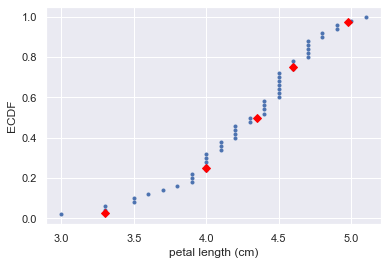

In [15]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Plot the percentiles as red diamonds on the ECDF:
# Let the x and y coordinates be ptiles_vers and percentiles/100 
# Specify the marker='D', color='red' and linestyle='none' keyword arguments
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


### boxplot

Make a box plot of the iris petal lengths. 

Remember that a pandas DataFrame, iris, stores the data which contains petal length. Inspect the data frame iris using iris.head() to make sure you know what the pertinent columns are.


In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


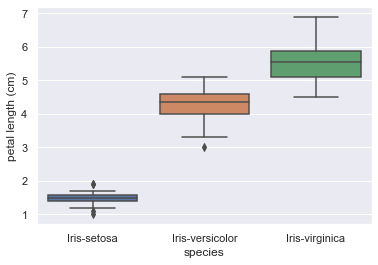

In [17]:
# Create box plot with Seaborn's default settings
# HINT: You want to get information about the 'petal legth' of the different 'species'
# Check sns.boxplot for help (You will need x, y and data for sure)
sns.boxplot(x='species', y='petal_length', data=iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### variance

In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor.

We will then use np.var() to compute it.

In [18]:
# Create an array called differences 
# Need: the difference between the petal lengths (versicolor_petal_length) and the mean petal length 
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)



# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


### std and variance

In [19]:
# Compute the variance of versicolor_petal_length: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation of versicolor_petal_length
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


### scatter plot

Till this point, we compared the petal lengths of different species of iris.
This time, we will compare two properties of a single species.

First, create a variable called versicolor_petal_width and store the appropriate width data in it. (We already have a variable called versicolor_petal_length.)

In [10]:
# Collect the versicolor petal width data into a list, called versicolor_petal_width
# HINT: we have already did this for versicolor_petal_length
versicolor_petal_width=[]
for s,p in zip(iris['species'],iris['petal_width']):
    if s == 'Iris-versicolor':
        versicolor_petal_width.append(p)

We will make a scatter plot of the petal length and width measurements of Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

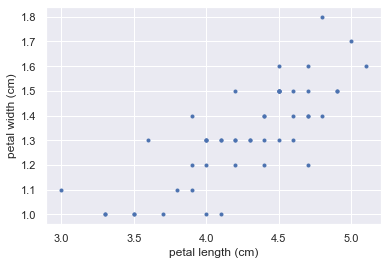

In [11]:
# Make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis)
# Use the marker='.' and linestyle='none' keyword arguments
plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Show the result
plt.show()


### covariance

The covariance may be computed using the Numpy function np.cov(). For datasts x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [23]:
# Compute the covariance matrix for the petal length and width: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Pearson correlation coefficient

The Pearson correlation coefficient is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of Iris versicolor.

In [12]:
# Define a function with signature pearson_r(x, y)
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for versicolor petal width and length
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
print(r)

0.7866680885228168


### random number generation

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

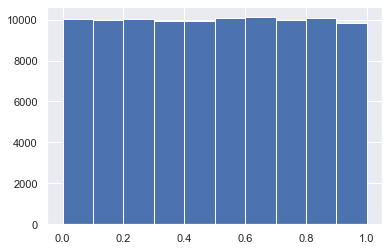

In [32]:
# Seed the random number generator using seed 42
np.random.seed(42)

# Initialize an empty array of 100000 entries to store the random numbers:  random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)
plt.show()

In the previous exercise, replace the number of trials (100000) with smaller numbers. You can see the power of the Law of Large Numbers.

### Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). 

In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [13]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials (HINT: number of trials is given in the parameter of our function)
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. 

To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. 

You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

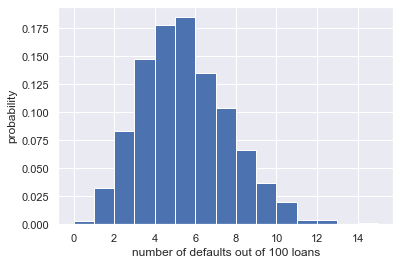

In [16]:
# Seed random number generator
np.random.seed(20)

# Initialize the number of defaults: n_defaults
# It should contain 1000 entries, since we are doing 1000 simulations
n_defaults = np.empty(1000)

# Compute the number of defaults
# HINT: Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function.
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)    

# Plot a histogram of n_defaults
# Include the 'density=True' keyword argument so that the height of the bars of the histogram indicate the probability
# Label your axes
#_ = plt.scatter([i for i in range(15)],szamlalo)
_ = plt.hist(n_defaults, bins=int(max(n_defaults)), density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Plot the number of defaults you got from the previous exercise (n_defaults), as a CDF. Use the ecdf() function you wrote earlier.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

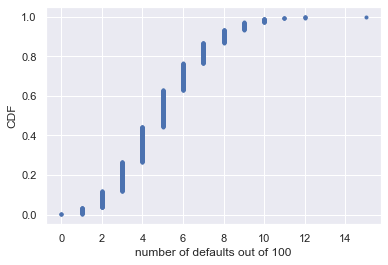

Probability of losing money = 0.029


In [17]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
# Include marker = '.' and linestyle = 'none'
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100')
plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last exercise, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

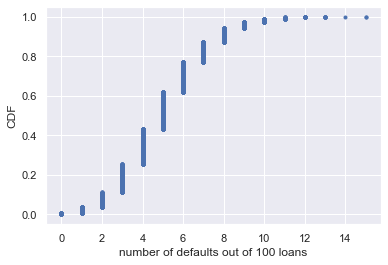

In [17]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

### Relationship between Binomial and Poisson distributions

The Poisson distribution is a limit of the Binomial distribution for rare events. More precisely, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). 

Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [18]:
# Draw 10000 samples from a Poisson distribution with a mean of 10: samples_poisson
# Use the np.random.poisson() function
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Make a list of the n and p values to consider for the Binomial distribution
# Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that np is always 10
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10000 samples from a Binomial distribution with each n, p pair
# Use the np.random.binomial() inside the provided for loop
# Print the mean and standard deviation of the samples. 
# HINT: There are three n,p pairs, these can be accessed inside the loop as n[i], p[i]
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.016 3.160086074777078
n = 20 Binom: 10.0159 2.228732193422978
n = 100 Binom: 9.9998 3.0010997917430204
n = 1000 Binom: 9.9487 3.1175741065770994


### The Normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution. Specifically, you will plot a Normal PDF for various values of the variance.

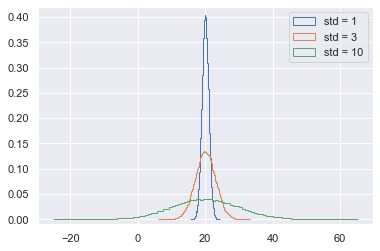

In [18]:
# Draw 100000 samples from Normal distribution with std 1,3,10 and each with mean 20: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Plot a histograms of each of the samples
# Use 100 bins 
# Use the keyword arguments density=True and histtype='step'
# ( The latter keyword argument makes the plot look much like the smooth theoretical PDF. )
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

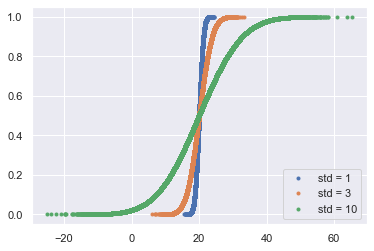

In [19]:
# Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs 
# Do not forget the marker and linestyle keyword arguments
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()
